### Data Preposssing and Cleaning

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")

In [3]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [5]:
data["clean_comment"][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

In [6]:
data.shape

(37249, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [8]:
data.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [9]:
data[data["clean_comment"].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(350)

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
# checking any rows with white space
data[data["clean_comment"].str.strip() == ""]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [16]:
# removing the rows with white spaces
data = data[~(data["clean_comment"].str.strip() == "")]

In [17]:
# converting rows to lower case
data["clean_comment"] = data["clean_comment"].str.lower()
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
# removing trailing and leading whitespaces from data
data["clean_comment"] = data["clean_comment"].str.strip()

# verifying the tranformation applied
data["clean_comment"].apply(lambda x: x.startswith(" ") or x.endswith(" ")).sum()

np.int64(0)

In [19]:
# checking comments containing urls
url_pattern = r"https[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
comment_with_url = data[data["clean_comment"].str.contains(url_pattern, regex = True)]
comment_with_url

,clean_comment,category


In [20]:
# checking comments containing new line
data_with_newlines =data[data["clean_comment"].str.contains("\n")]
data_with_newlines.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [21]:
# replace \n with spaces
data["clean_comment"] = data["clean_comment"].str.replace("\n", " ", regex = True)

# checking if \n has been removed
data_with_newlines =data[data["clean_comment"].str.contains("\n")]
data_with_newlines.head()

,clean_comment,category


### EDA

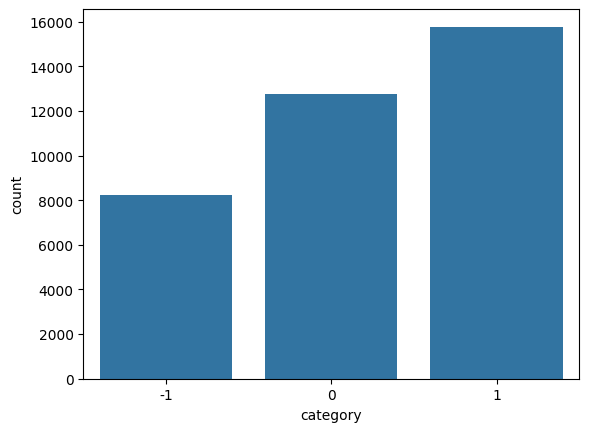

In [22]:
plot = sns.countplot(data = data, x = "category")

In [23]:
data["category"].value_counts(normalize = True).round(4) * 100

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [24]:
data["word_count"] = data["clean_comment"].apply(lambda x: len(x.split()))

In [25]:
data.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [26]:
data["word_count"].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

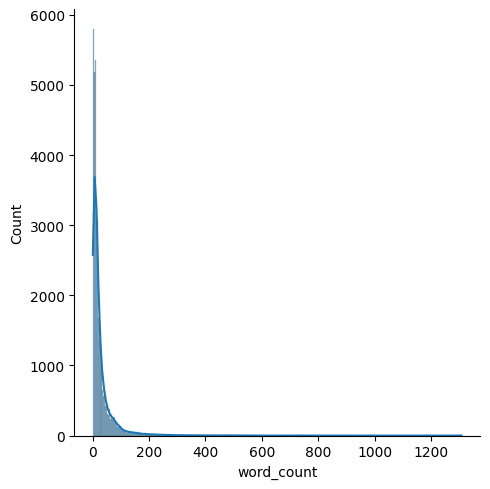

In [27]:
sns.displot(data["word_count"], kde = True)

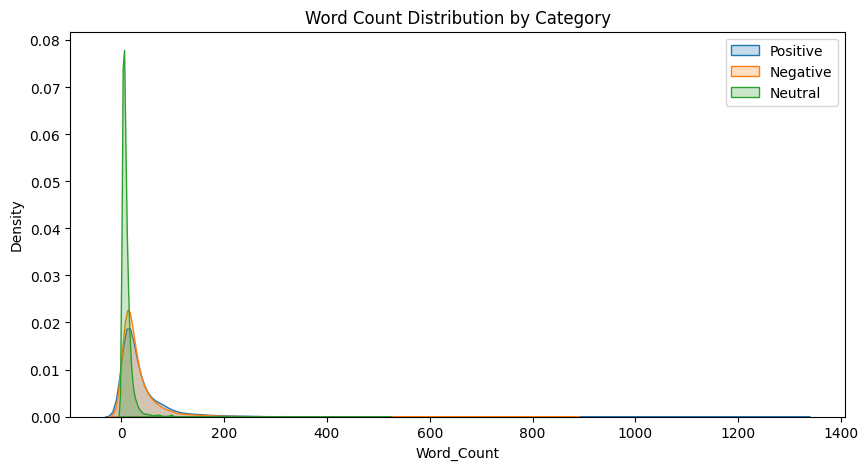

In [28]:
plt.figure(figsize = (10,5))

# plot KDE for category 1
sns.kdeplot(data[data["category"] == 1]["word_count"], label = "Positive", fill = True)

# plot KDE for category -1 
sns.kdeplot(data[data["category"] == -1]["word_count"], label = "Negative", fill = True)

# plot KDE for category 0
sns.kdeplot(data[data["category"] == 0]["word_count"], label = "Neutral", fill = True)

# add title and labels
plt.title("Word Count Distribution by Category")
plt.xlabel("Word_Count")
plt.ylabel("Density")

plt.legend()
plt.show()


**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common positive sentiment <br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments <br>
**Negative comments (category -1)**: This comments have beenn distributed somewhat similar to positive comments but with a small proportion of longer comments

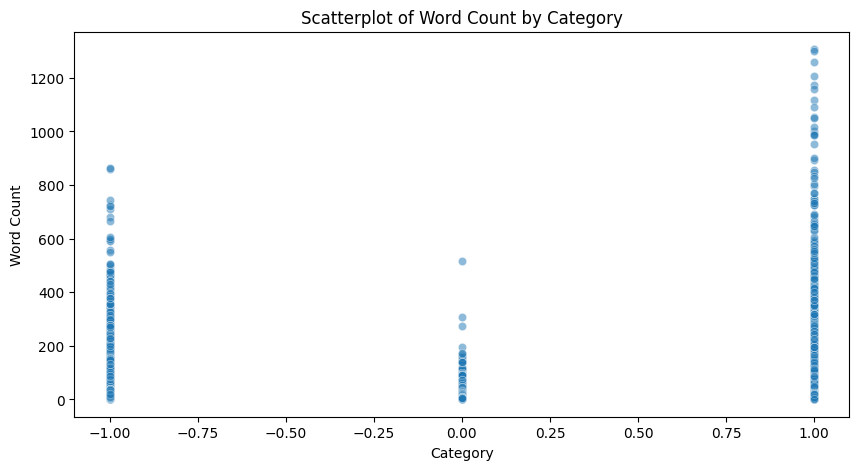

In [29]:
# create a scatterplot between category and word count
plt.figure(figsize = (10,5))
sns.scatterplot(data = data, x = "category", y = "word_count", alpha = 0.5)
plt.title("Scatterplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()


<Axes: xlabel='category', ylabel='word_count'>

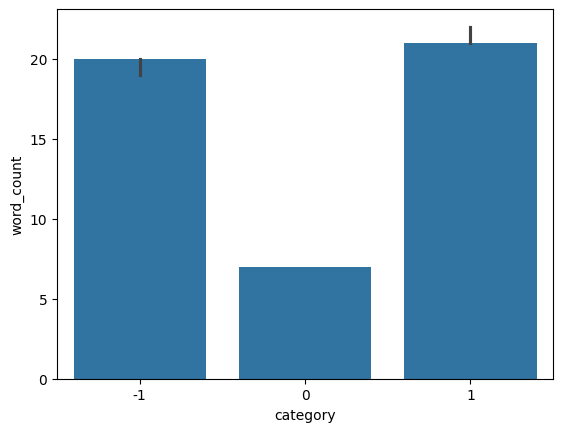

In [30]:
# median word count among sentiments

sns.barplot(data, x = "category", y = "word_count", estimator = "median")

In [31]:
# Download nltk stopwords if not already installed
nltk.download("stopwords")

# define list of english stopwords
stop_words = set(stopwords.words("english"))

# create new column "num_stop_words" by counting the number of stopwords in each comment
data["num_stop_words"] = data["clean_comment"].apply(lambda x: len([i for i in x.split() if i in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data.head()

,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


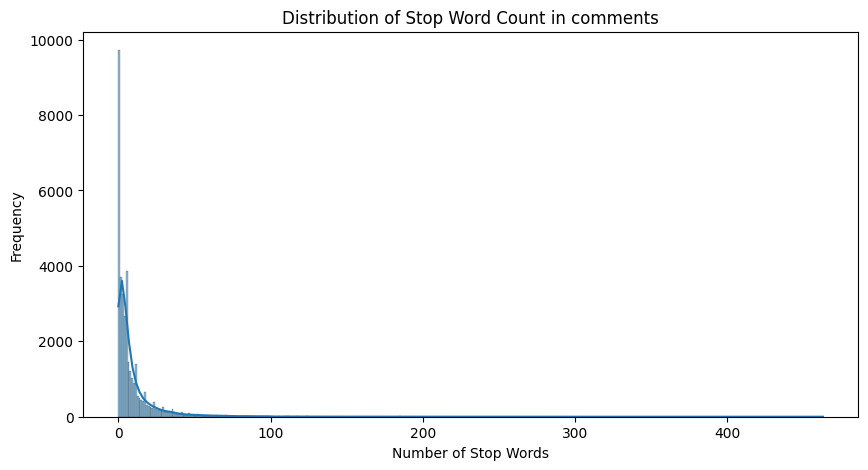

In [33]:
# create a distribution plot dor the num_stop_words column

plt.figure(figsize = (10, 5))
sns.histplot(data = data, x= "num_stop_words", kde = True)
plt.title("Distribution of Stop Word Count in comments")
plt.xlabel("Number of Stop Words")
plt.ylabel("Frequency")
plt.show()

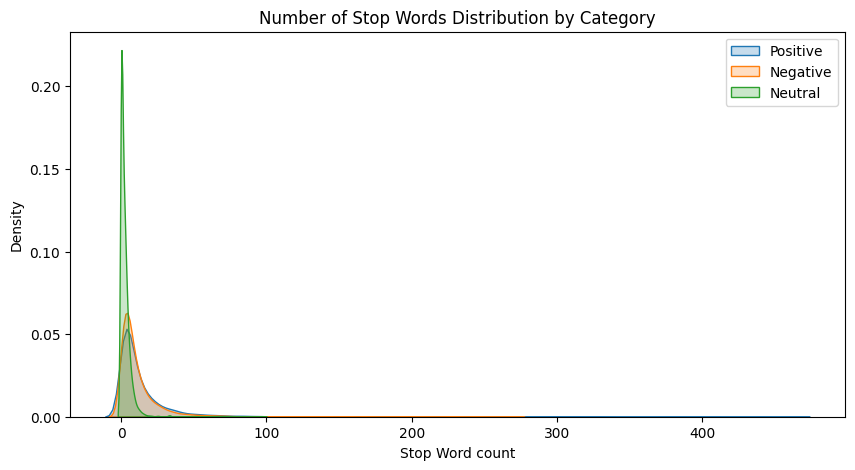

In [34]:
plt.figure(figsize = (10,5))

# plot KDE for category 1
sns.kdeplot(data[data["category"] == 1]["num_stop_words"], label = "Positive", fill = True)

# plot KDE for category -1 
sns.kdeplot(data[data["category"] == -1]["num_stop_words"], label = "Negative", fill = True)

# plot KDE for category 0
sns.kdeplot(data[data["category"] == 0]["num_stop_words"], label = "Neutral", fill = True)

# add title and labels
plt.title("Number of Stop Words Distribution by Category")
plt.xlabel("Stop Word count")
plt.ylabel("Density")

plt.legend()
plt.show()


<Axes: xlabel='category', ylabel='num_stop_words'>

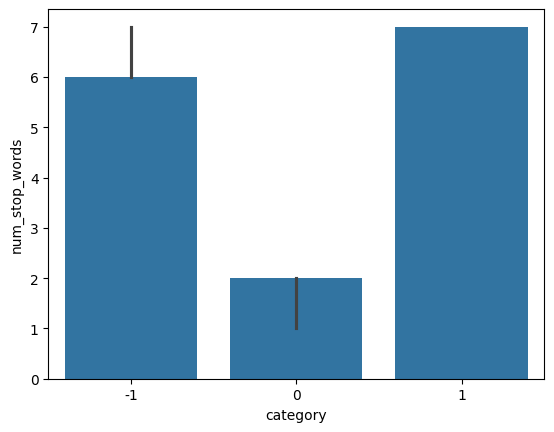

In [35]:
# median word count among sentiments

sns.barplot(data, x = "category", y = "num_stop_words", estimator = "median")

Text(0, 0.5, 'Most Common Stop Word')

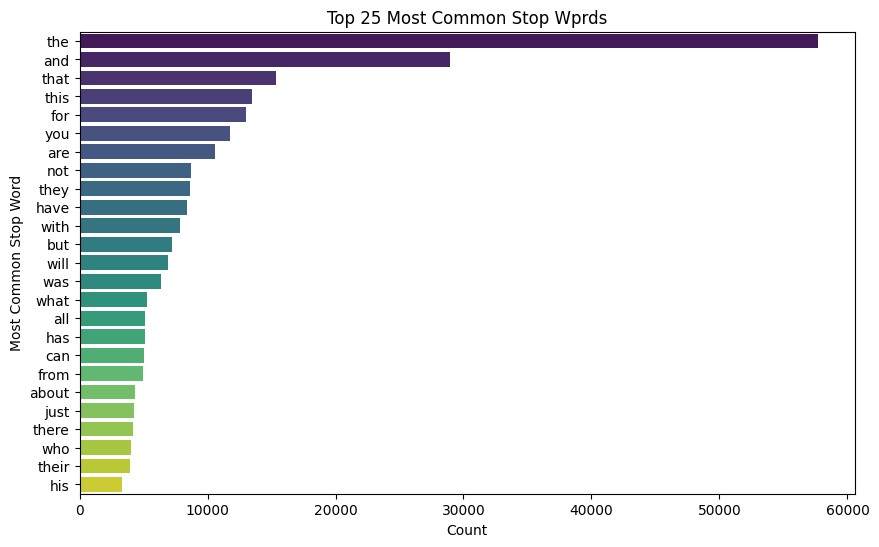

In [ ]:
# create a frequency distribution of stop words in the clean_comment column

# extract all stopwords from comments
all_stop_words = [word for comment in data["clean_comment"] for word in comment.split() if word in stop_words]

# count the most common stopwords
most_common_stopwords = Counter(all_stop_words).most_common(25)

# converting the most common stopwords to dataframe for plotting
top_25_data = pd.DataFrame(most_common_stopwords, columns = ["stop_words", "count"])

# create the barplot for the top 25 most common stop words
plt.figure(figsize = (10,6))
sns.barplot(data = top_25_data, y = "stop_words", x = "count", palette = "viridis")
plt.title("Top 25 Most Common Stop Wprds")
plt.xlabel("Count")
plt.ylabel("Most Common Stop Word")

In [37]:
data["num_char"] = data["clean_comment"].apply(len)
data.head()

,clean_comment,category,word_count,num_stop_words,num_char
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [38]:
len(data["clean_comment"][0])

259

In [39]:
data["num_char"].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_char, dtype: float64

In [ ]:
# combine all comments into one large string
all_text = " ".join(data["clean_comment"])

# count the frequency of each character 
char_freq = Counter(all_text)

# covert the character frequency into a dataframe for better display
char_freg_data = pd.DataFrame(char_freq.items(), columns = ["character", "frequency"]).sort_values(by = "frequency")


In [ ]:
char_freg_data["character"].values

array(['✓', 'ெ', 'ய', ..., 't', 'e', ' '], shape=(1378,), dtype=object)

In [ ]:
char_freg_data.head(10)

,character,frequency
577,✓,1
580,ெ,1
581,ய,1
583,☠,1
569,ವ,1
570,☹,1
573,ध,1
575,⛵,1
517,়,1
518,✈,1


In [43]:
# create a new column to count punctuation character in each comment
data["num_punctuation"] = data["clean_comment"].apply(lambda x: len([char for char in x if char in '.,!?;:"\'()[]{}-']))

data.head()

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


Text(0, 0.5, 'Top 25 Bigrams')

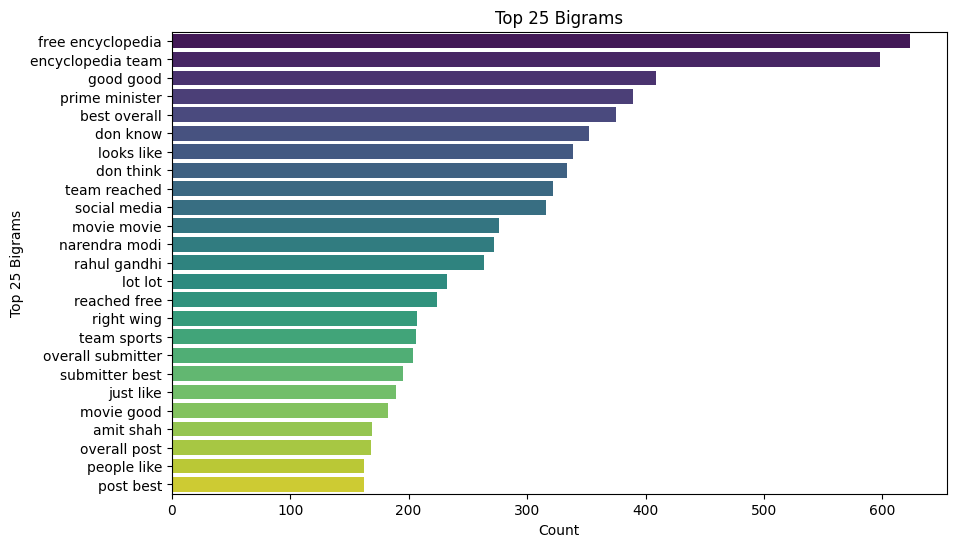

In [ ]:
# create a function to extract the top 25 n-grams
def get_top_ngrams(corpus, n:int, t = None):
    vec = CountVectorizer(ngram_range = (n,n), stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:t]

# get the top 25 bigram
top_25_bigrams = get_top_ngrams(data["clean_comment"], 2, 25)

# convert the bigrams into a DataFrame
top_25_bigram_data = pd.DataFrame( top_25_bigrams, columns = ["bigram", "count"])


# create the countplot for the top 25 bigrams
plt.figure(figsize = (10,6))
sns.barplot(data = top_25_bigram_data, y = "bigram", x = "count", palette = "viridis")
plt.title("Top 25 Bigrams")
plt.xlabel("Count")
plt.ylabel("Top 25 Bigrams")

    

Text(0, 0.5, 'Top 25 trigrams')

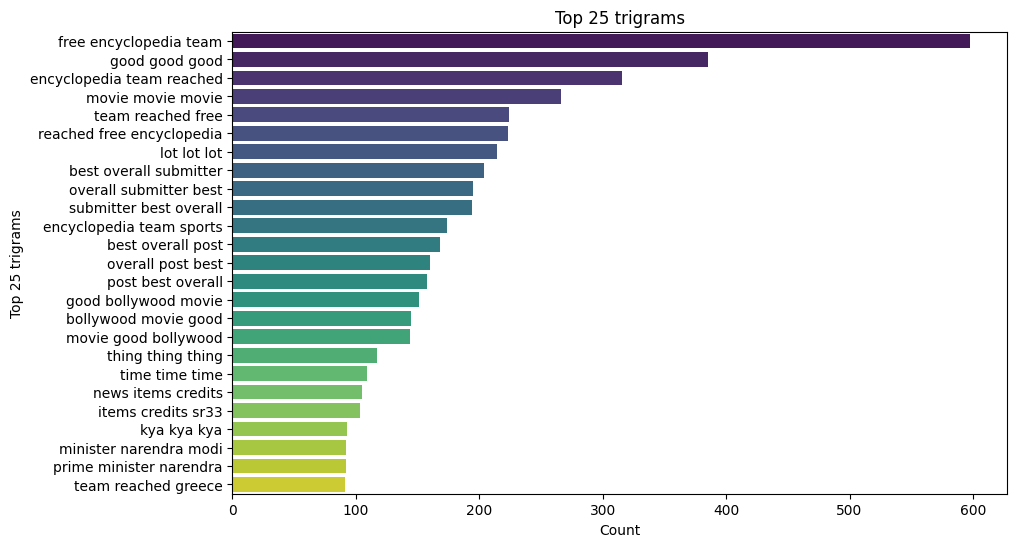

In [ ]:
# get the top 25 trigram
top_25_trigrams = get_top_ngrams(data["clean_comment"], 3, 25)

# convert the trigrams into a DataFrame
top_25_trigram_data = pd.DataFrame( top_25_trigrams, columns = ["trigram", "count"])


# create the countplot for the top 25 bigrams
plt.figure(figsize = (10,6))
sns.barplot(data = top_25_trigram_data, y = "trigram", x = "count", palette = "viridis")
plt.title("Top 25 trigrams")
plt.xlabel("Count")
plt.ylabel("Top 25 trigrams")


    

In [46]:
# remove non-english characyers from the "clean_comment" column
# keeping only standard English letters, digits, and punctuation
data["clean_comment"] = data["clean_comment"].apply(lambda x: re.sub(r"[^A-Za-z0-9\s!?.,]", "", str(x)))


In [ ]:
# combine all comments into one large string
all_text = " ".join(data["clean_comment"])

# count the frequency of each character 
char_freq = Counter(all_text)

# covert the character frequency into a dataframe for better display
char_freq_data = pd.DataFrame(char_freq.items(), columns = ["character", "frequency"]).sort_values(by = "frequency")


In [ ]:
char_freq_data

,character,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [49]:
data.head()

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [50]:
# defining stopwords but keepingg essential once for sentiment analysis
stop_words = set(stopwords.words("english")) - {"not", "but", "however", "no", "yet"}

# removing stopwords from the comment but keeping essential ones
data["clean_comment"] = data["clean_comment"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

In [51]:
# the above preprocessing shoul affect the other column because the "clean_comment" column has been modified


In [52]:
nltk.download("wordnet")

# define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the clean_comment_no_stopwords column
data["clean_comment"] = data["clean_comment"].apply(lambda x : " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\henny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


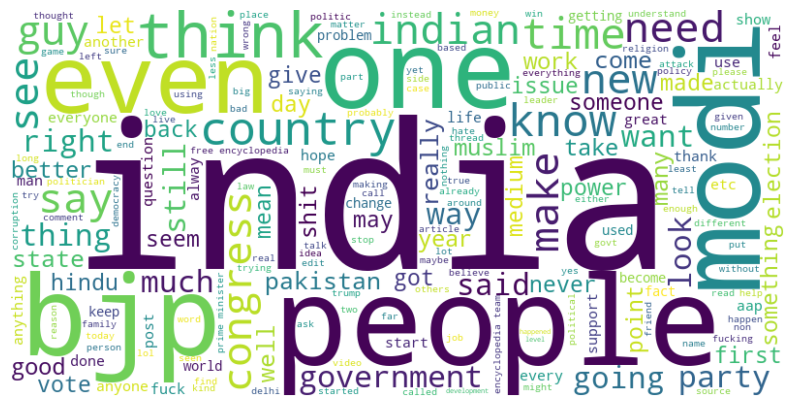

In [53]:
def plot_word_cloud (text):
    wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(" ".join(text))
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()


plot_word_cloud(data["clean_comment"])

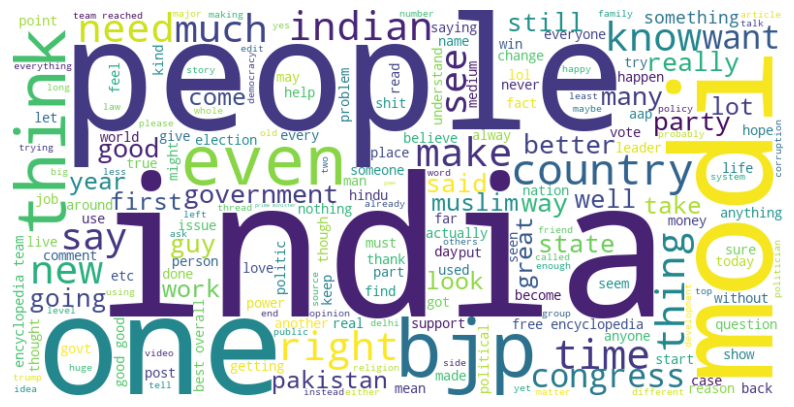

In [54]:
plot_word_cloud(data[data["category"] == 1]["clean_comment"])


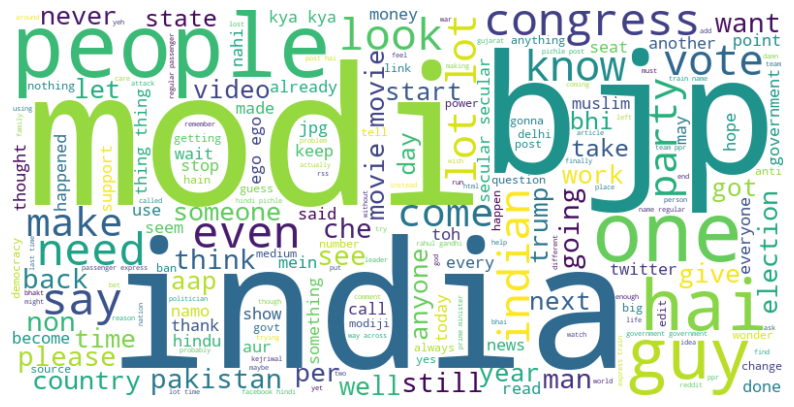

In [55]:
plot_word_cloud(data[data["category"] == 0]["clean_comment"])


In [56]:
# plot n most frequent used words in the data
def plot_top_n_words(data, n=20):
    # flatten all words in the comment column
    words = " ".join(data["clean_comment"]).split()
    most_common = Counter(words).most_common(n)

    # split the words and their count for plotting
    word, count = zip(*most_common)
    # plot the top n words
    plt.figure(figsize = (10,5))
    sns.barplot(x = list(count), y = list (word))
    plt.title(f"Top {n} most Frequent Words")
    plt.xlabel("Count")
    plt.ylabel("Words")
    plt.show()


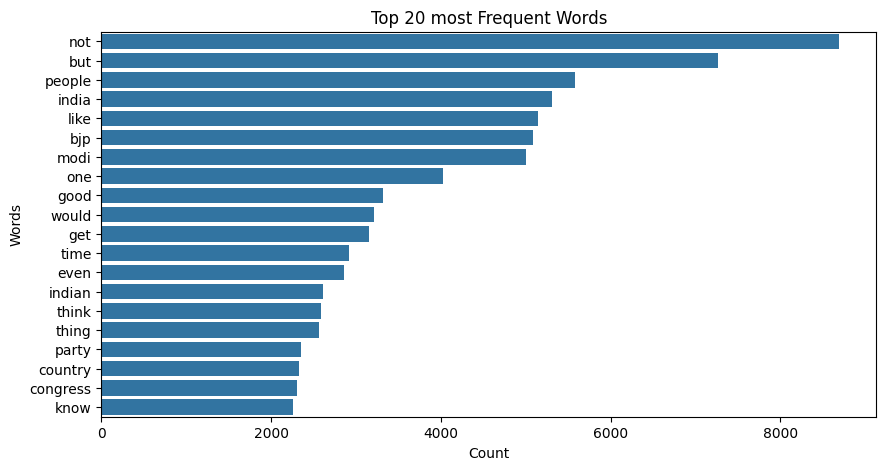

In [57]:
plot_top_n_words(data, 20)


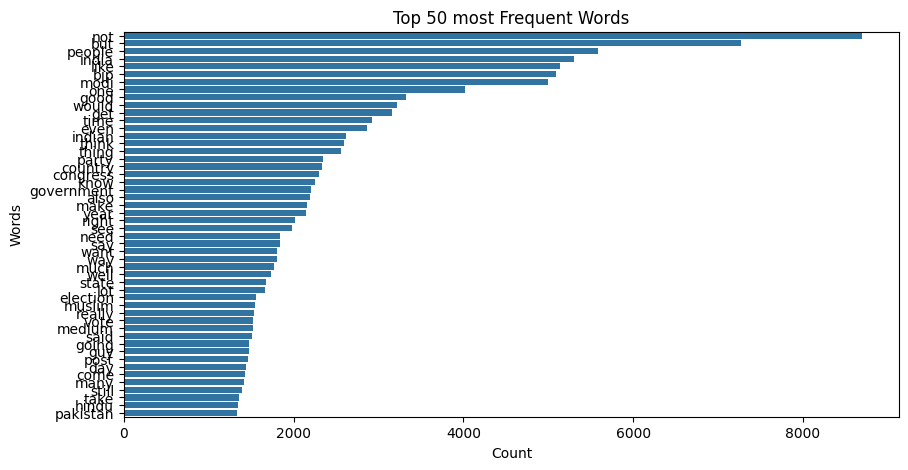

In [58]:
plot_top_n_words(data, 50)


In [59]:
def plot_top_n_words_by_category(data, n, start = 0):
    # flatten all words in the content column and count their occurences by category
    word_category_counts = {}

    for idx, row in data.iterrows():
        words = row["clean_comment"].split()
        category = row["category"]

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1:0, 0:0, 1:0} #initialize counts for each sentiment category

            # increament the count for the corresponding sentiment category
            word_category_counts[word][category] +=1


    # get the total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # get the top n most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key = lambda x: x[1], reverse = True)[start: start+n]
    top_words = [word for word, _ in most_common_words]


    # prepare for plotting
    word_label = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # plot the stacked bar
    plt.figure(figsize = (12, 8))
    bar_width = 0.75


    # plot negative, positive and neutral counts in a stacked manner
    plt.barh(word_label, negative_counts, color = "red", label = "negative (-1)", height = bar_width)
    plt.barh(word_label, neutral_counts, left = neutral_counts, color = "gray", label = "neutral (0)", height = bar_width)
    plt.barh(word_label, positive_counts, left = [i+j for i, j in zip(negative_counts, neutral_counts)], color = "green", label = "positive (1)", height = bar_width)

    plt.xlabel("February")
    plt.ylabel("Words")
    plt.title(f"Top {n} Most Frequent Words with Stacked Sentiment Category")
    plt.legend(title = "Sentiment", loc = "lower right")
    plt.gca().invert_yaxis()
    plt.show()



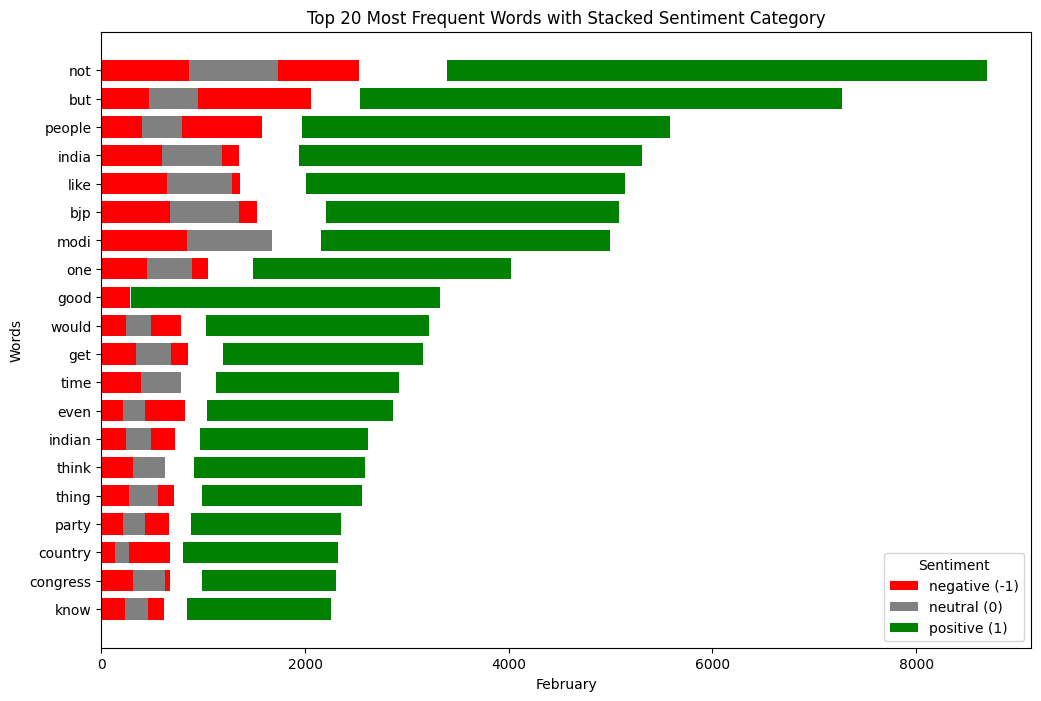

In [60]:
plot_top_n_words_by_category(data, 20)
